In [8]:
import numpy as np
import skimage as sk
import skimage.io as skio
import skimage.transform
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage import exposure

In [9]:
#removes the frayed edges of the image with a relative crop
def crop_edges(im, perc=0.06):
    height, width = im.shape
    a, b = perc, 1-perc
    new_im = im[int(a * height):int(b * height), int(a * width):int(b * width)]
    return new_im

#split the image into the 3 channels: red, green, blue
def get_channels(im):
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    return (r, g, b)

#compute similarity score, closer to 0 = more similar
def ssd_score(image1, image2):
    return np.sum(np.sum(np.square(image1-image2)))

#create image pyramids to align the 3 channels
def align(image1, image2, pyramids=5):
    best_x, best_y = 0,0
    #create pyramids in top down order
    for p in reversed(range(pyramids)):
        scale = (0.5 ** p)
        one = sk.transform.rescale(image1, scale)
        two = sk.transform.rescale(image2, scale)  
        #if it's the smallest scaled img, just loop over enitre picture since it's small.
        if p+1 == pyramids:
            height, width = one.shape
            range_x, range_y = [0, width], [0, height]   
        #otherwise take the previous adjustment, and go through the ones in between for more minute adjustment
        else:
            range_x, range_y = [(best_x-1) * 2, (best_x+1) * 2], [(best_y-1) * 2, (best_y+1) * 2]
        best = float('inf')
        for i in range(range_x[0], range_x[1]):
            modded_x = np.roll(one, i, axis=0)
            for j in range(range_y[0], range_y[1]):
                final_mod = np.roll(modded_x, j, axis=1)
                score = ssd_score(final_mod, two)
                if score < best:
                    best = score
                    best_x, best_y = i,j
    return (best_x, best_y)

#colorizes the original image
def colorize(file):
    imname = 'data/' + file
    im = skio.imread(imname)
    height, width = im.shape
    im = sk.img_as_float(im)
    
    r, g, b = get_channels(im)
    
    r = crop_edges(r)
    g = crop_edges(g)
    b = crop_edges(b)
    
    r_adj = align(r, b)
    g_adj = align(g, b)
    
    r = np.roll(r, r_adj[0], axis=0)
    r = np.roll(r, r_adj[1], axis=1)
    g = np.roll(g, g_adj[0], axis=0)
    g = np.roll(g, g_adj[1], axis=1)
    print("Red adjustment: " + str(r_adj))
    print("Green adjustment: " + str(g_adj))
    return np.dstack([r, g, b])

#Normalizes the intensity values in the image to add contrast
def add_contrast(img):
    p2, p98 = np.percentile(img, (2, 98))
    im_out = exposure.rescale_intensity(img, in_range=(p2, p98))
    return im_out



Run cell below for main assignment

train.tif


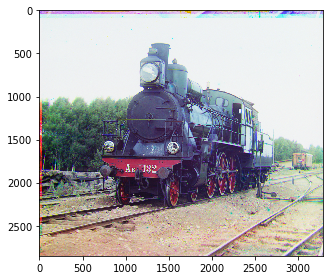

melons.tif


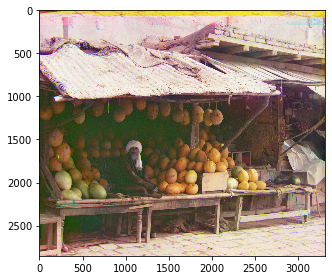

self_portrait.tif


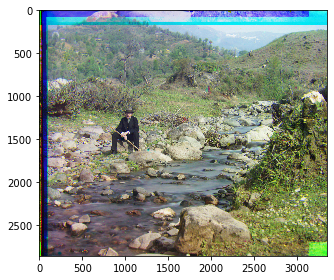

emir.tif


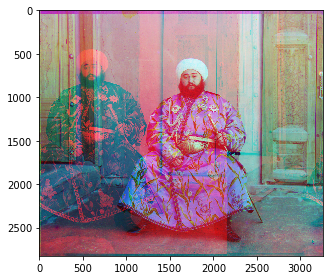

harvesters.tif


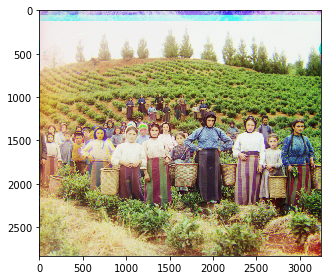

lady.tif


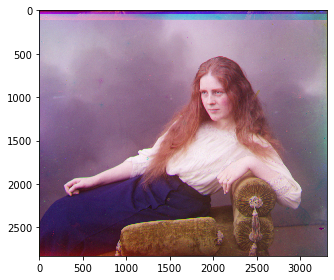

three_generations.tif


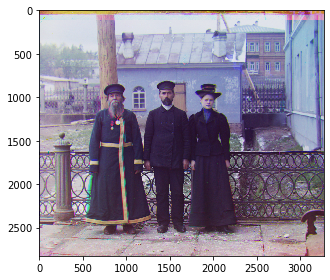

icon.tif


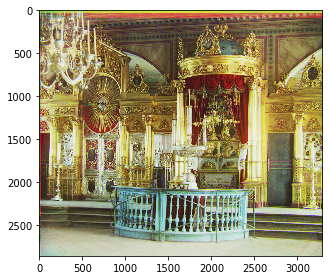

workshop.tif


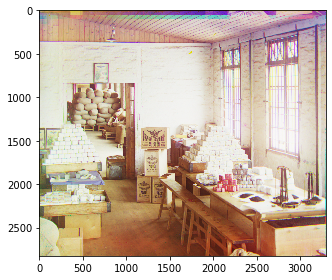

cathedral.jpg


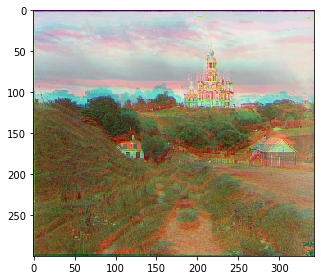

castle.tif


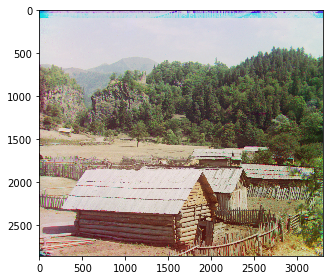

monastery.jpg


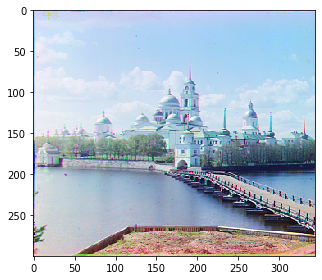

tobolsk.jpg


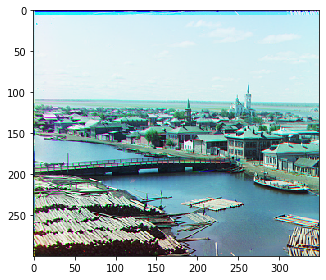

onion_church.tif


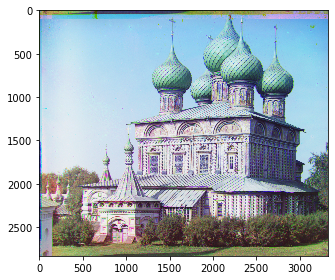

In [17]:
from os import listdir
from os.path import isfile, join

#get all the pictures
files = [f for f in listdir('data/') if isfile(join('data/', f))]
colorized = []
for file in files:
    print(file)
    im_out = colorize(file)
    colorized.append(im_out)
    skio.imshow(im_out)
    skio.show()


Run cell below for Bells and Whistles: Auto adding contrast

Before


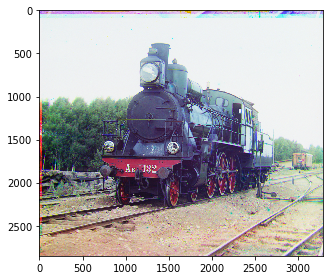

After


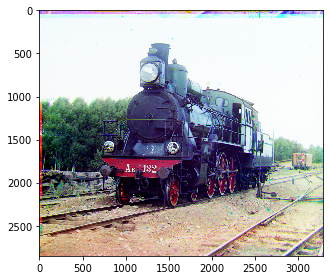

Before


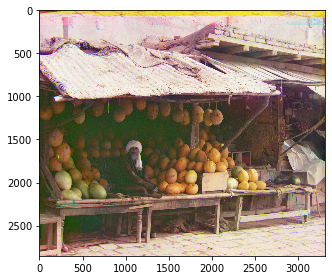

After


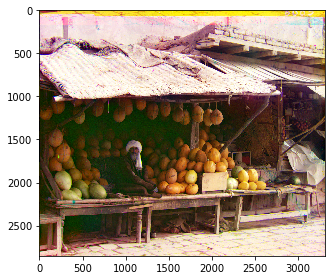

Before


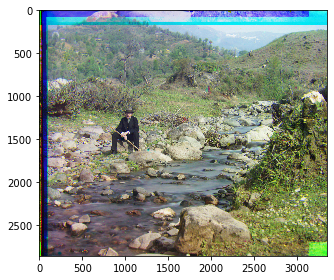

After


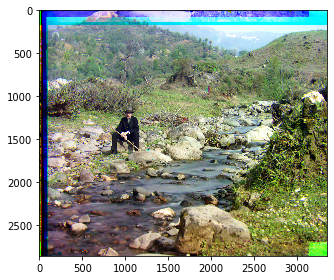

Before


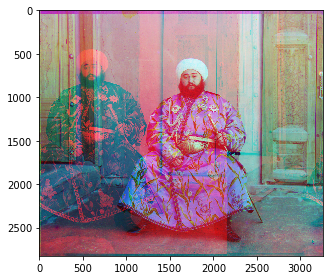

After


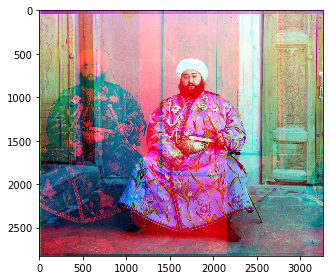

Before


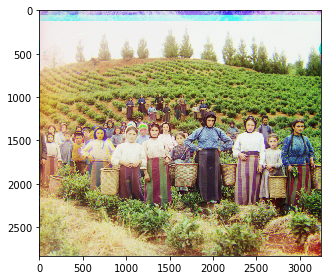

After


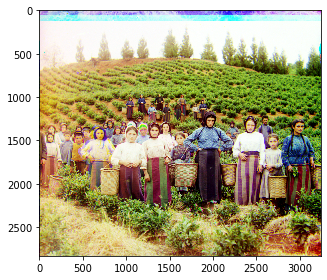

Before


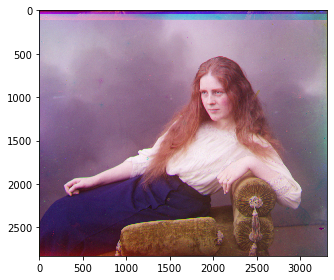

After


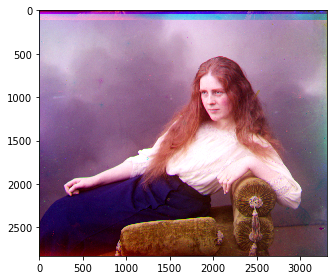

Before


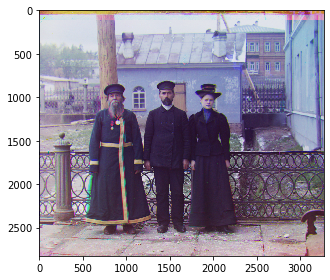

After


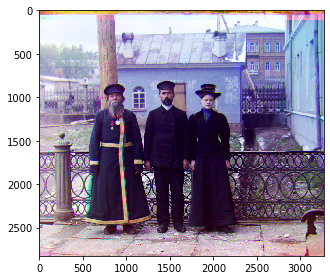

Before


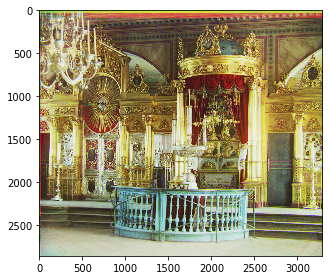

After


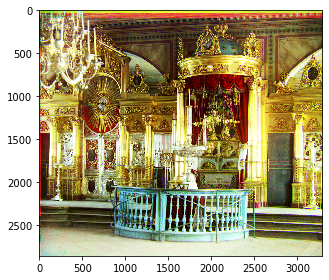

Before


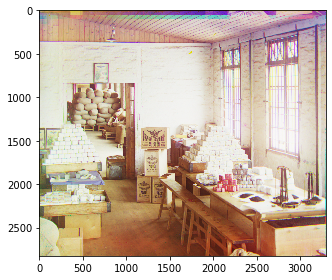

After


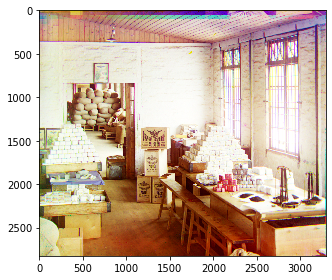

Before


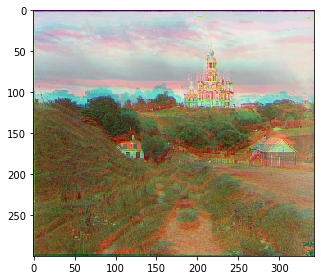

After


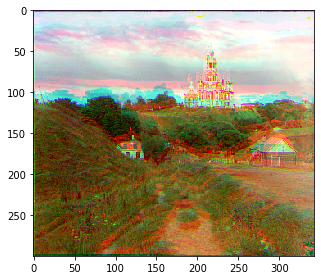

Before


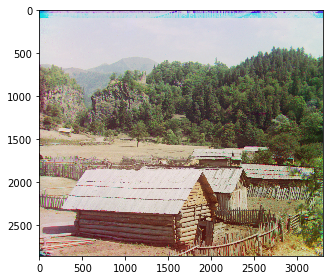

After


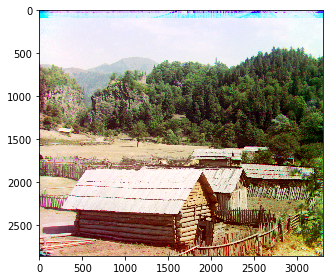

Before


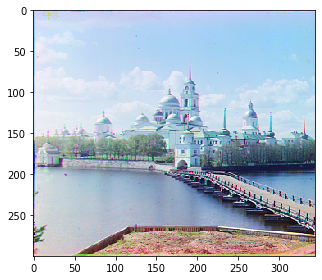

After


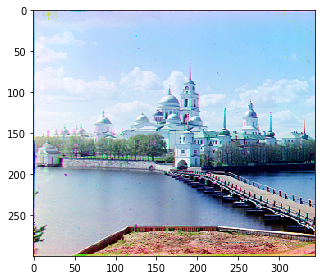

Before


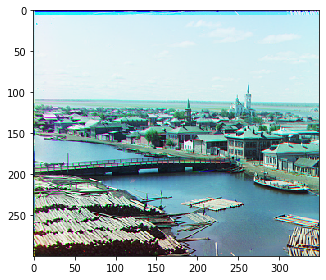

After


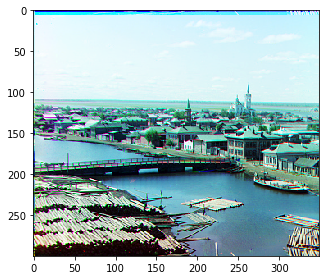

Before


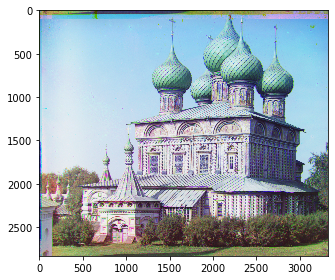

After


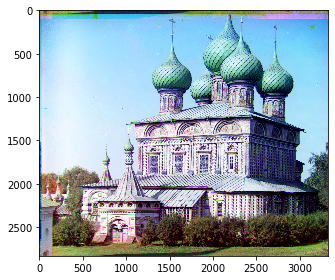

In [18]:
for img in colorized:
    contrast = add_contrast(img)
    print("Before")
    skio.imshow(img)
    skio.show()
    print("After")
    skio.imshow(contrast)
    skio.show()